In [28]:
import sys

sys.path.append("..")

In [29]:
from lib import constants, data_io

df_raw = data_io.load_raw_data()
df_cleaned = data_io.load_cleaned_data()
df_encoded = data_io.load_encoded_data()

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

y_encoded = df_encoded[constants.TARGET]
X_transformed = df_encoded.drop([constants.TARGET], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_

all_feature_names = X_transformed.columns

feature_importances = pd.DataFrame({"Feature": all_feature_names, "Importance": importances})

feature_importances = feature_importances.sort_values("Importance", ascending=False)
print(feature_importances)

                           Feature  Importance
2                           Weight    0.293779
0                              Age    0.099870
1                           Height    0.094431
5                             FCVC    0.089872
22                     Gender_Male    0.055876
6                              NCP    0.055571
10                             FAF    0.047190
8                             CH2O    0.047126
11                             TUE    0.046067
3   family_history_with_overweight    0.031692
16                  CALC_Sometimes    0.023395
13                  CAEC_Sometimes    0.020830
17                         CALC_no    0.020341
20    MTRANS_Public_Transportation    0.019651
4                             FAVC    0.016759
12                 CAEC_Frequently    0.016045
9                              SCC    0.006824
15                 CALC_Frequently    0.004443
21                  MTRANS_Walking    0.003265
7                            SMOKE    0.003205
14           

<Axes: xlabel='Feature', ylabel='Importance'>

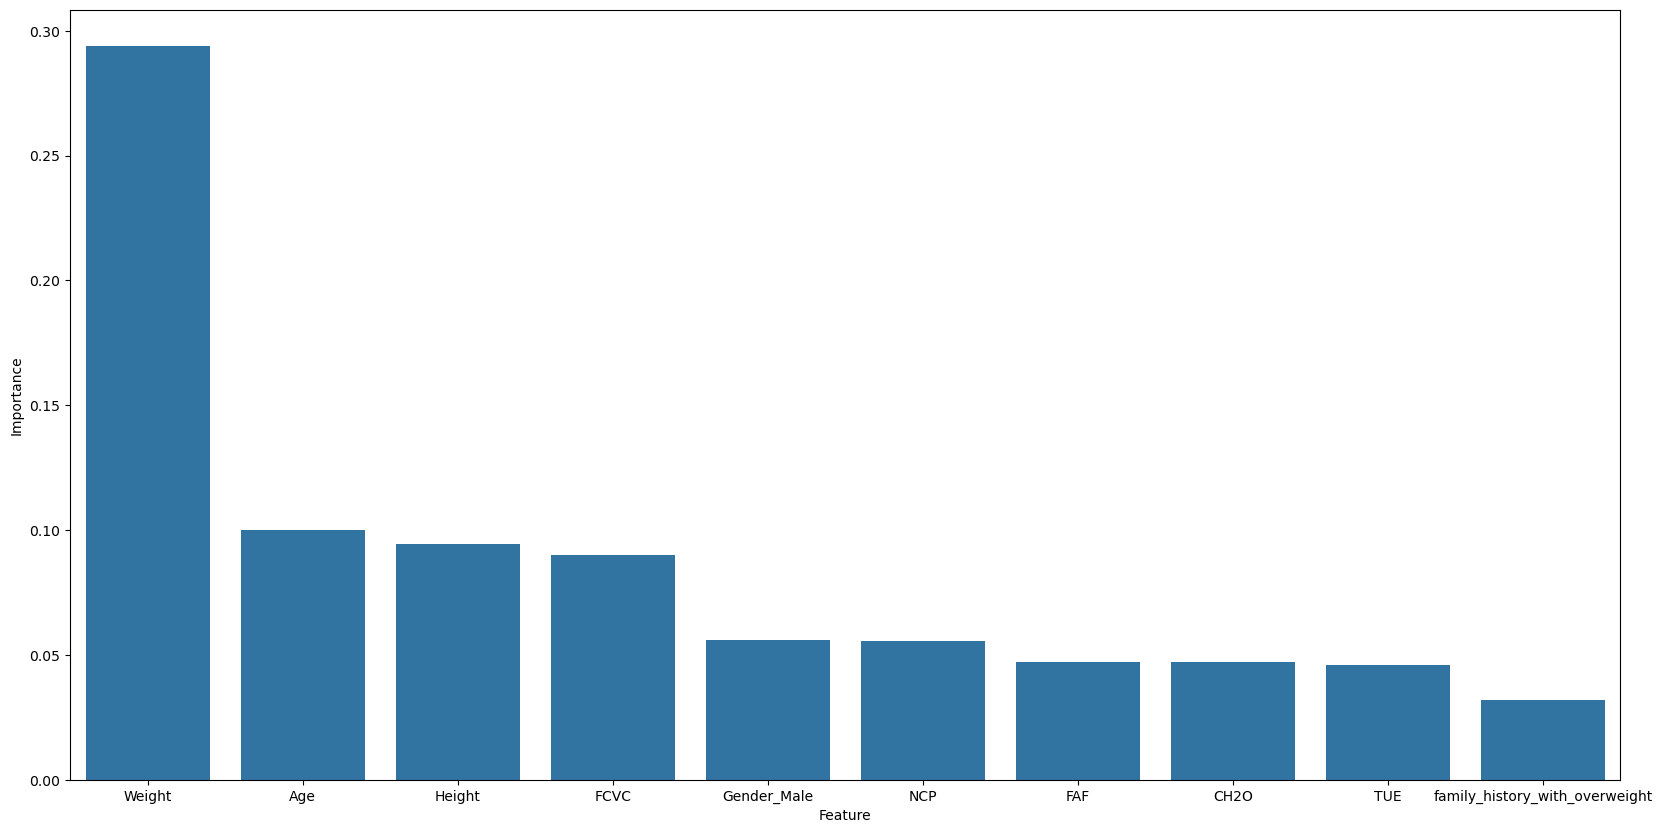

In [31]:
top_features = feature_importances.head(10)
plt.figure(figsize=(20, 10))
sns.barplot(feature_importances, x=top_features["Feature"], y=top_features["Importance"])